<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

* Импортируем библиотеки
* Прочитаем файлы
* Посмотрим общую информацию, проверим файлы на наличие пропусков и дубликатов

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train_new.csv' , index_col='date')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

In [3]:
def show(data):
    display('Информация')
    display(data.info())
    print()
    display('Пропуски')
    display(data.isna().sum())
    print()
    display('Дубликаты')
    display(data.duplicated().sum())

In [4]:
for data in [gold_recovery_train, gold_recovery_test, gold_recovery_full]:
    show(data)

'Информация'

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

None

'Пропуски'

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

'Дубликаты'

0

'Информация'

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

None

'Пропуски'

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

'Дубликаты'

0

'Информация'

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

None

'Пропуски'

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

'Дубликаты'

0

* Создадим функцию, которая будет считать эффективность обогащения металлов
* Подсчитаем MAE

In [5]:
def recovery(data, C, F, T): # эффективность обогащения
    C = data[C] # доля золота в концентрате после флотации/очистки
    F = data[F] # доля золота в сырье/концентрате до флотации/очистки
    T = data[T] # доля золота в отвальных хвостах после флотации/очистки
    return ((C * (F - T)) / (F * (C - T))) * 100

In [6]:
recovery_train = recovery(gold_recovery_train, 'rougher.output.concentrate_au',
                          'rougher.input.feed_au', 'rougher.output.tail_au')

In [7]:
print('MAE: ', (gold_recovery_train['rougher.output.recovery'] - recovery_train).abs().mean())

MAE:  9.73512347450521e-15


<span style='color:Purple'> MAE составляет 9,7%, так то можно считать данные recovery верными <span>

Посмотрим, какие признаки недоступны в тестовой выборке

In [8]:
set(gold_recovery_train.columns) - set(gold_recovery_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

### Вывод: 
В тестовой выборке недоступны:
* данные о флотации
* параметры продуктов
* расчётные характеристики
* данные вторичной очистки

Создадим функцию для удаления целевого признака из датасета и заполним прощенные значения соседними

In [9]:
def preprocessing(data):
    data = data.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])
    data = data.ffill()
    return data

In [10]:
gold_recovery_train = preprocessing(gold_recovery_train)

In [11]:
gold_recovery_train.isna().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

Заменим пропуски в данных на соседние значения

In [12]:
gold_recovery_test = gold_recovery_test.ffill()
gold_recovery_full = gold_recovery_full.ffill()

## Анализ данных

Посмотрим, как изменяются концентрации металлов после каждой стадии очистки

In [13]:
def conc(data, stage_1, stage_2, stage_3, stage_4):
    metals = ['au', 'ag', 'pb']
    result = []
    for metal in metals:
        values = [round(data[stage_1 + metal].mean(), 2), 
                  round(data[stage_2 + metal].mean(), 2),
                  round(data[stage_3 + metal].mean(), 2),
                  round(data[stage_4 + metal].mean(), 2)]
        result.append((metal, values))
    return result

In [14]:
result = conc(gold_recovery_full, 'rougher.input.feed_', 'rougher.output.concentrate_',
              'primary_cleaner.output.concentrate_', 'final.output.concentrate_')
for metal, values in result:
    print('Изменение концентрации', metal, 'по стадиям:')
    print('Начальная:', values[0])
    print('После флотации:', values[1])
    print('После первичной отчистки:', values[2])
    print('Финальная:', values[3], '\n')

Изменение концентрации au по стадиям:
Начальная: 8.27
После флотации: 19.77
После первичной отчистки: 32.12
Финальная: 44.08 

Изменение концентрации ag по стадиям:
Начальная: 8.79
После флотации: 11.99
После первичной отчистки: 8.44
Финальная: 5.17 

Изменение концентрации pb по стадиям:
Начальная: 3.59
После флотации: 7.61
После первичной отчистки: 9.81
Финальная: 9.98 



Отобразим это на графиках

In [15]:
def concentration(data, stage_1, stage_2, stage_3, stage_4):
    metals = ['au', 'ag', 'pb']
    for metal in metals:
        plt.figure(figsize=(12, 6), dpi=80)
        sns.kdeplot(data[stage_1 + metal], shade=True, color='blue', 
                    label='начальная', alpha=0.5)
        sns.kdeplot(data[stage_2 + metal], shade=True, color='green', 
                    label='после флотации', alpha=0.5)
        sns.kdeplot(data[stage_3 + metal], shade=True, color='red', 
                    label='после первичной отчистки', alpha=0.5)
        sns.kdeplot(data[stage_4 + metal], shade=True, color='yellow', 
                    label='финальная', alpha=0.5)
        plt.title('Изменение концентрации ' + metal + ' по стадиям:')
        plt.legend()
        plt.show()

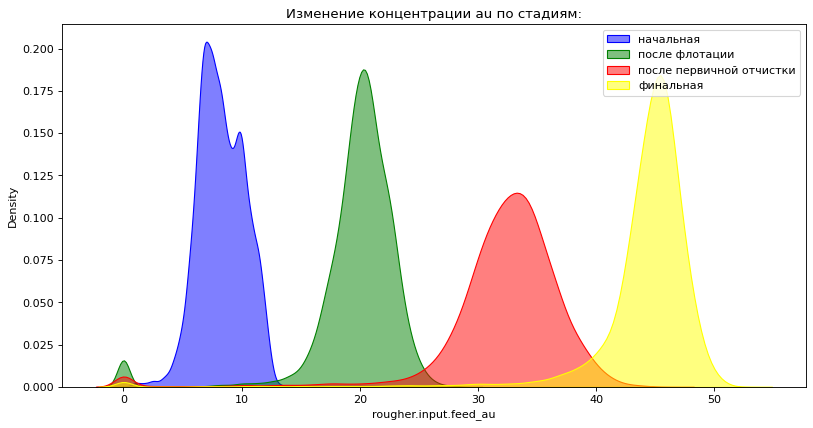

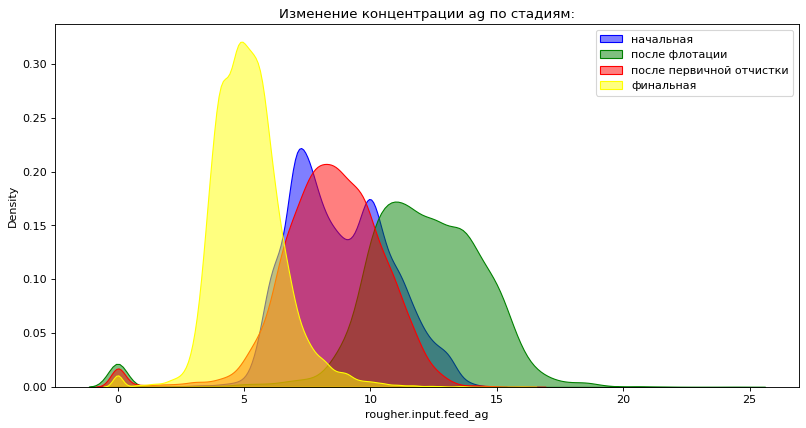

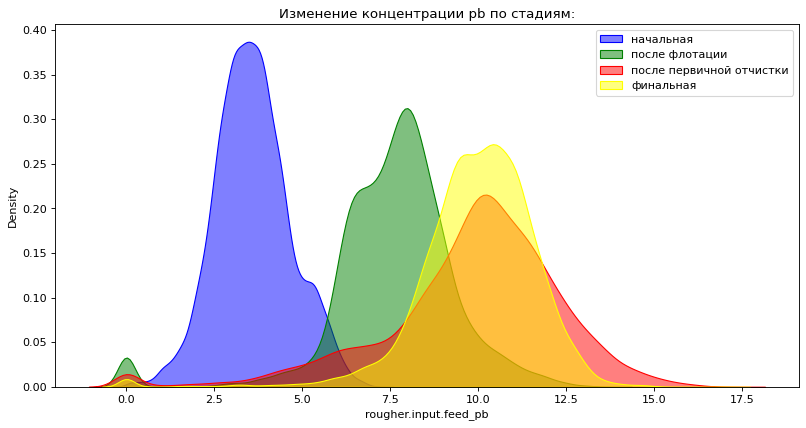

In [16]:
concentration(gold_recovery_full, 'rougher.input.feed_', 'rougher.output.concentrate_',
              'primary_cleaner.output.concentrate_', 'final.output.concentrate_')

* Видим, что после флотации повышается концентрация всех металлов.   
* Далее идут процессы первичной и вторичной очистки, после чего золото, серебро и свинец отделяются друг от друга   

Посмотрим на изменения гранул сырья

In [17]:
print('Train:', gold_recovery_train['rougher.input.feed_size'].mean()), 
print('Test:', gold_recovery_test['rougher.input.feed_size'].mean())

Train: 60.23985599255732
Test: 55.952754028895136


In [18]:
def grains(train, test):
    plt.figure(figsize=(12, 6), dpi=80)
    sns.kdeplot(train, shade=True, label='Train', alpha=0.3)
    sns.kdeplot(test, shade=True, label='Test', alpha=0.3)
    plt.xlim(0, 200)
    plt.title('Размеры гранул сырья')
    plt.legend()
    plt.show()

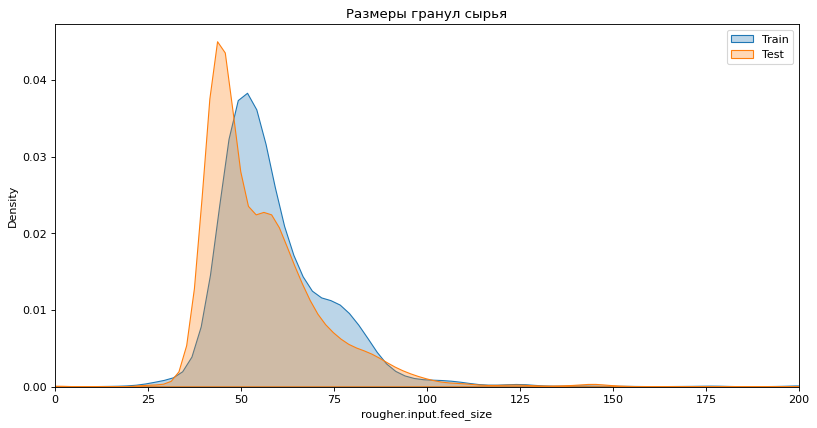

In [19]:
grains(gold_recovery_train['rougher.input.feed_size'],
     gold_recovery_test['rougher.input.feed_size'])

* Распределения гранул на графике схожи. 
* На тренировочной выборке наблюдается небольшое положительное смещение. 

Создадим функцию для подсчёта концентрации всех металлов на этапах очистки

In [20]:
def concentrations(data):
    data['rougher_input_feed_all_metal'] = (data['rougher.input.feed_au'] + 
                                 data['rougher.input.feed_ag'] + 
                                 data['rougher.input.feed_pb'])

    data['rougher_output_concentrate_all_metal'] = (data['rougher.output.concentrate_au'] + 
                                 data['rougher.output.concentrate_ag'] + 
                                 data['rougher.output.concentrate_pb'])

    data['primary_output_concentrate_all_metal'] = (
        data['primary_cleaner.output.concentrate_au'] + 
        data['primary_cleaner.output.concentrate_ag'] + 
        data['primary_cleaner.output.concentrate_pb']
    )

    data['final_output_concentrate_all_metal'] = (data['final.output.concentrate_au'] + 
                                 data['final.output.concentrate_ag'] + 
                                 data['final.output.concentrate_pb'])

    return data

In [21]:
def show_concentrations(data):
    plt.figure(figsize=(16,10), dpi= 80)
    sns.kdeplot(data['rougher_input_feed_all_metal'], shade=True, color="blue", 
                label="начальная", alpha=0.5)
    sns.kdeplot(data['rougher_output_concentrate_all_metal'], shade=True, color="green", 
                label="после флотации", alpha=0.5)
    sns.kdeplot(data['primary_output_concentrate_all_metal'], shade=True, color="red", 
                label="после первичной отчистки", alpha=0.5)
    sns.kdeplot(data['final_output_concentrate_all_metal'], shade=True, color="yellow", 
                label="финальная", alpha=0.5)

    plt.title('Концентрация всех металлов, на этапах отчистки')
    plt.legend()
    plt.show()

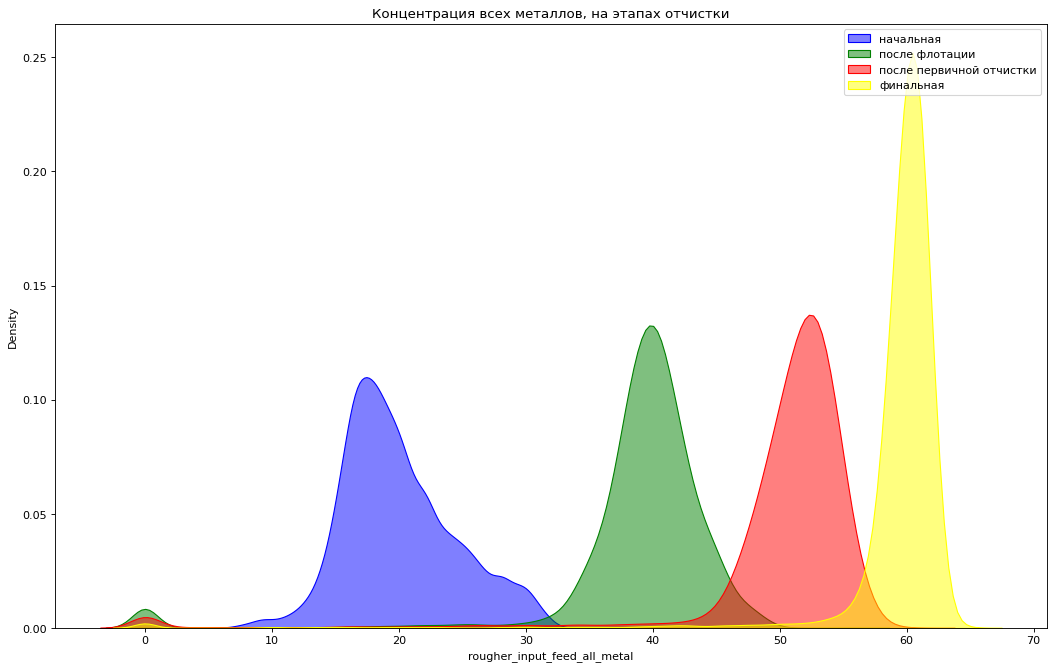

In [22]:
gold_recovery_train = concentrations(gold_recovery_train)
show_concentrations(gold_recovery_train)

Уберём выбросы

In [23]:
def cleaning(data):
    
    data = data.query('1 < rougher_input_feed_all_metal')
    data = data.query('1 < rougher_output_concentrate_all_metal')
    data = data.query('1 < primary_output_concentrate_all_metal')
    data = data.query('1 < final_output_concentrate_all_metal')
    
    rougher_input_feed_all_metal_low = data['rougher_input_feed_all_metal'].quantile(.025)
    rougher_input_feed_all_metal_up = data['rougher_input_feed_all_metal'].quantile(.975)
    rougher_output_concentrate_all_metal_low = data['rougher_output_concentrate_all_metal'].quantile(.025)
    rougher_output_concentrate_all_metal_up = data['rougher_output_concentrate_all_metal'].quantile(.975)    
    primary_output_concentrate_all_metal_low = data['primary_output_concentrate_all_metal'].quantile(.025)
    primary_output_concentrate_all_metal_up = data['primary_output_concentrate_all_metal'].quantile(.975)    
    final_output_concentrate_all_metal_low = data['final_output_concentrate_all_metal'].quantile(.025)
    final_output_concentrate_all_metal_up = data['final_output_concentrate_all_metal'].quantile(.975)
    
    data = data.query('@rougher_input_feed_all_metal_low < rougher_input_feed_all_metal < @rougher_input_feed_all_metal_up')
    data = data.query('@rougher_output_concentrate_all_metal_low < rougher_output_concentrate_all_metal < @rougher_output_concentrate_all_metal_up')
    data = data.query('@primary_output_concentrate_all_metal_low < rougher_output_concentrate_all_metal < @primary_output_concentrate_all_metal_up')
    data = data.query('@final_output_concentrate_all_metal_low < final_output_concentrate_all_metal < @final_output_concentrate_all_metal_up')
    
    return data

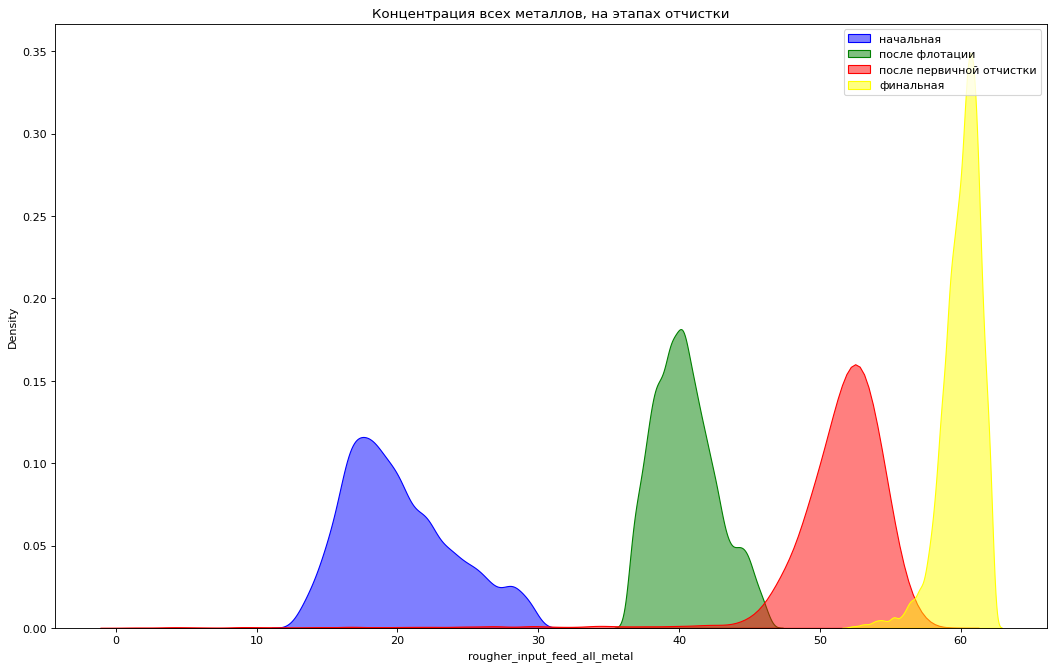

In [24]:
gold_recovery_train = cleaning(gold_recovery_train)
show_concentrations(gold_recovery_train)

Как видим концентрации всех металлов значительно повышаются на каждом этапе

## Модель

Создадим функции для подсчёта итоговой sMAPE

In [25]:
def total_smape(y_true,y_pred):
        numerator = np.abs(y_true - y_pred)
        denominator = (np.abs(y_true) + np.abs(y_pred))/2
        smape = ((numerator/denominator)*100).sum() / len(y_pred)
        return 0.25*smape[0] + 0.75*smape[1]

Создадим scorer для подсчёта sMAPE в дальнейшем

In [26]:
scorer = make_scorer(total_smape, greater_is_better=False)

Уберём выбросы

In [27]:
def sizing_test(data):
    data = data.merge(gold_recovery_full[['rougher.output.recovery', 'final.output.recovery']],
                     how='left', on='date')
    preprocessing(data)
    data['rougher_input_feed_all_metal'] = (data['rougher.input.feed_au'] + 
                                 data['rougher.input.feed_ag'] + 
                                 data['rougher.input.feed_pb'])
    data = data.query('rougher_input_feed_all_metal > 1')
    rougher_input_feed_all_metal_low = data['rougher_input_feed_all_metal'].quantile(0.25)
    rougher_input_feed_all_metal_up = data['rougher_input_feed_all_metal'].quantile(0.975)
    data = data.query('@rougher_input_feed_all_metal_low < rougher_input_feed_all_metal < @rougher_input_feed_all_metal_up')
    return data

In [28]:
gold_recovery_test = sizing_test(gold_recovery_test)

Уберём из тренировочной выборки данные, недоступные в тестовой

In [29]:
gold_recovery_train = gold_recovery_train[gold_recovery_test.columns]

Разделим данные на обучающие и тестовые выборки, отделим целевые признаки

In [30]:
features_train = gold_recovery_train.drop(columns=['rougher.output.recovery', 
                                                   'final.output.recovery'], axis=1)
target_train = gold_recovery_train[['rougher.output.recovery', 'final.output.recovery']]

In [31]:
features_test = gold_recovery_test.drop(columns=['rougher.output.recovery', 
                                                   'final.output.recovery'], axis=1)
target_test = gold_recovery_test[['rougher.output.recovery', 'final.output.recovery']]

Выберем лучшую необученную модель

In [32]:
best_score = 100
rfr_model = RandomForestRegressor(random_state=42)

score = cross_val_score(rfr_model, features_train, target_train, cv=3, scoring=scorer)
score = abs(score.mean())

print(score)

10.027117319549646


In [33]:
best_score = 100
dtr_model = DecisionTreeRegressor(random_state=42)

score = cross_val_score(dtr_model, features_train, target_train, cv=3, scoring=scorer)
score = abs(score.mean())

print(score)

13.128004726612138


In [34]:
best_score = 100
lr_model = LinearRegression()

score = cross_val_score(lr_model, features_train, target_train, cv=3, scoring=scorer)
score = abs(score.mean())

print(score)

12.135025134356129


На основе кросс-валидации выбираем модель 'Случайный лес'

Подберём оптимальные гиперпараметры для модели

In [35]:
# Определение гиперпараметров для случайного леса
param_dist = {"max_depth": [3, None],
              "n_estimators": sp_randint(10, 100),
              "max_features": sp_randint(1, len(features_train.columns))}

# Создание экземпляра модели случайного леса
rfr_model = RandomForestRegressor(random_state=42)

# Создание экземпляра класса RandomizedSearchCV
random_search = RandomizedSearchCV(rfr_model, param_distributions=param_dist, 
                                   n_iter=10, cv=3, random_state=42, 
                                   scoring=scorer, n_jobs=-1)

# Подгонка модели на тренировочных данных
random_search.fit(features_train, target_train)

# Вывод наилучших гиперпараметров
print(f' sMAPE: {abs(random_search.best_score_)}, глубина: {random_search.best_estimator_.max_depth}, количество деревьев: {random_search.best_estimator_.n_estimators}')


 sMAPE: 8.809986120148158, глубина: 3, количество деревьев: 70


In [36]:
model = RandomForestRegressor(random_state=42, max_depth=3, n_estimators=70)
model.fit(features_train, target_train)
smape = scorer(model, features_test, target_test)

print(f'sMAPE: {abs(smape)}')

sMAPE: 8.073096905137701


In [37]:
# Создаем простую модель
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(features_train, target_train)

# Оцениваем качество простой модели
smape_dummy = scorer(dummy_model, features_test, target_test)
print(f'sMAPE простой модели: {abs(smape_dummy)}')

# Оцениваем качество нашей модели
model = RandomForestRegressor(random_state=42, max_depth=3, n_estimators=70)
model.fit(features_train, target_train)
smape = scorer(model, features_test, target_test)
print(f'sMAPE нашей модели: {abs(smape)}')

# Сравниваем качество моделей
if abs(smape) < abs(smape_dummy):
    print('Модель адекватна')
else:
    print('Модель не адекватна')


sMAPE простой модели: 8.621381905584926
sMAPE нашей модели: 8.073096905137701
Модель адекватна


# Вывод:
* Модель имеет sMAPE = 8, значит, ошибается только в 8% случаев
* Модель прошла проверку на адекватность

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке